In [1]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, BatchNormalization, 
                                    Flatten, Dense, Dropout, LeakyReLU, 
                                    GlobalAveragePooling2D)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
testing_path = 'D:\\Research Dataset\\Shrimp Recognition\\validating\\' 
training_path = 'D:\\Research Dataset\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (224,224),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 38042 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:

model = Sequential()
# Block 1: Initial feature extraction
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', 
                    kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
    
# Block 2: Mid-level features
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
    
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    
# Block 3: Higher-level features
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
    
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4: Complex features
model.add(Conv2D(256, (3, 3), padding='same', 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(256, (3, 3), padding='same', 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 5: Deep features
model.add(Conv2D(512, (3, 3), padding='same', 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

# Global Average Pooling instead of Flatten (reduces overfitting)
model.add(GlobalAveragePooling2D())

# Classification head - simplified and more robust
model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.30))

model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(4, activation='softmax'))


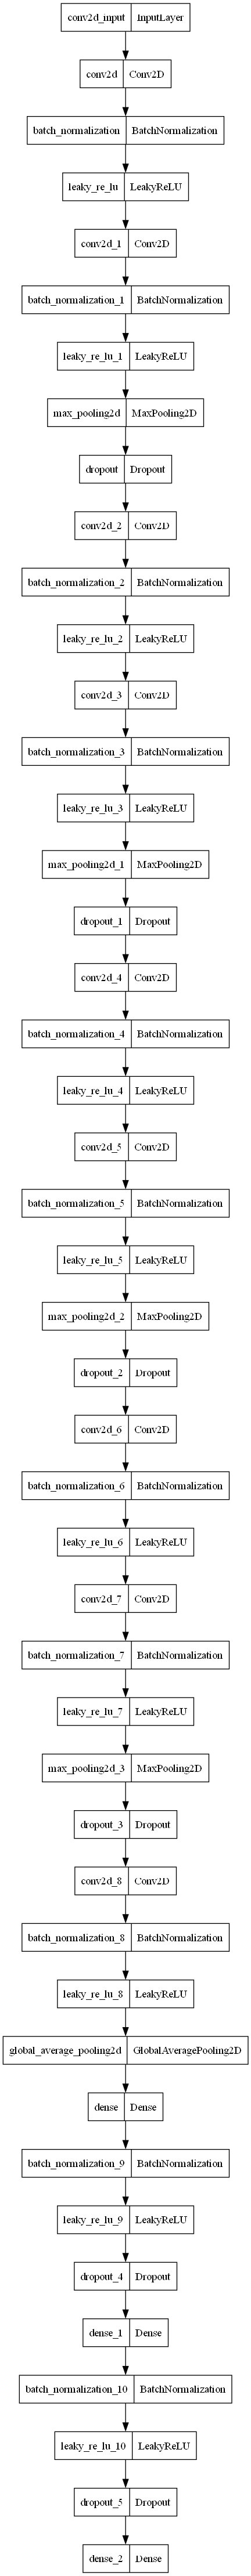

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_1.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Shrimp_model_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
1189/1189 [==============================] - ETA: 0s - loss: 0.8739 - accuracy: 0.9563
Epoch 1: val_accuracy improved from -inf to 0.43730, saving model to Shrimp_model_1.h5
1189/1189 [==============================] - 122s 97ms/step - loss: 0.8739 - accuracy: 0.9563 - val_loss: 3.6149 - val_accuracy: 0.4373
Epoch 2/50
1189/1189 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.9707
Epoch 2: val_accuracy improved from 0.43730 to 0.51207, saving model to Shrimp_model_1.h5
1189/1189 [==============================] - 103s 87ms/step - loss: 0.2926 - accuracy: 0.9707 - val_loss: 2.2543 - val_accuracy: 0.5121
Epoch 3/50
1189/1189 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9725
Epoch 3: val_accuracy did not improve from 0.51207
1189/1189 [==============================] - 101s 85ms/step - loss: 0.2476 - accuracy: 0.9725 - val_loss: 3.2064 - val_accuracy: 0.4100
Epoch 4/50
1189/1189 [==============================] - ETA: 0s - loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


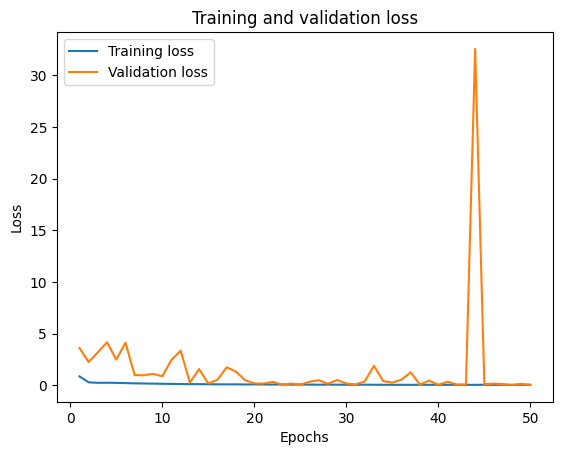

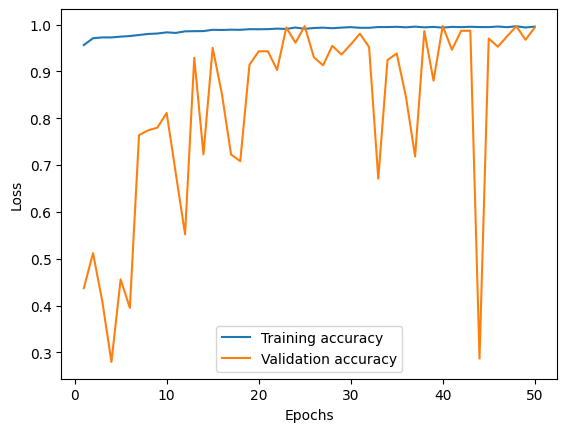

In [9]:
from matplotlib import pyplot as plt
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationLoss.jpeg")
plt.show()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [10]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [11]:
his_df.to_excel('model_1_history.xlsx',index=False)